In [48]:
import numpy as np
import matplotlib.pylab as plt

- **신경망 학습** : 최적의 피라미터값을 찾는 과정이다.
- **오버 피팅** : 특정 데이터셋에만 너무 집중되어 나타나는 결과.

----
## 활성화 함수
- 시그모이드 함수
- 소프트맥스 함수

In [49]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [50]:
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

----
## 손실 함수
- 평균 제곱 오차
- 교차 엔트로피 오차

----
##### ▽ **평균 제곱 오차 확인하기** ▽

In [51]:
# 평균 제곱 오차
def mean_squared_error(y, t):
	return 0.5 * np.sum((y-t)**2)

In [52]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [53]:
# 추측 결과는 2, 정답은 2로 오답에 매우 멈
mean_squared_error(y, t)

0.09750000000000003

In [54]:
y = np.array([0.1, 0.05, 0.05, 0.0, 0.05, 0.1, 0.0, 0.1, 0.55, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [55]:
# 추측 결과는 8, 정답은 2로 오답에 매우 가까움
mean_squared_error(y, t)

0.62

----
##### ▽ **교차 엔트로피 오차 확인하기** ▽

In [56]:
# 교차 엔트로피 오차
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [57]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [58]:
# 추측 결과는 2, 정답은 2로 오답에 매우 멈
cross_entropy_error(y, t)

0.510825457099338

In [59]:
y = np.array([0.1, 0.05, 0.05, 0.0, 0.05, 0.1, 0.0, 0.1, 0.55, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [60]:
# 추측 결과는 8, 정답은 2로 오답에 매우 가까움
cross_entropy_error(y, t)

2.9957302735559908

----
## 미니 배치
- 학습 데이터에서 일부분만 미리 골라 손실 함수의 합을 만들고 학습함

In [61]:
import numpy as np
import matplotlib.pylab as plt
import sys, os
from dataset.mnist import load_mnist

sys.path.append(os.pardir)

(x_train, t_train), (x_text, t_test) = load_mnist(normalize=False, flatten=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

print(x_text.shape)
print(t_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


- normalize : 이미지 배열에 값을 0~255로 표현할 지, 소수점으로 표현할 지 결정
- flatten : 이미지 배열을 하나의 배열로 묶어서 받을 지, 각 배열로 따로 받을 지 결정
- one_hot_label : 정답 배열 값을 정답을 쓸 지, 정답에 해당하는 인덱스가 1로 이외에는 0으로된 배열로 얻을 지 결정

In [62]:
# x_train배열은 숫자 이미지의 행렬로 문제 배열임, 10번째 행렬의 숫자는 3
print(x_train[10])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  42 118 219
 166 118 118   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18 232
 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 207 254 210 254 254 254  34   0   0   0   

In [63]:
# t_train배열은 정답 배열로, 10번째 값의 정답은 3
print(t_train[10])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [64]:
np.random.choice(60000, 10)

array([43718, 17474, 15433,  9867,  2546, 17354, 55557, 26235, 33939,
       29146])

In [65]:
train_size = x_train.shape[0]
batch_size = 100

print("train_size : ", train_size)
print("batch_size : ", batch_size)
print(train_size, "에서 ", batch_size, "만큼 랜덤으로 뽑기\n")

batch_mask = np.random.choice(train_size, batch_size) # np.random.choice(number, amount) number에서 amount만큼 랜덤 뽑기
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch.shape)
print(t_batch.shape)

train_size :  60000
batch_size :  100
60000 에서  100 만큼 랜덤으로 뽑기

(100, 784)
(100, 10)


In [66]:
# 교차 엔트로피 오차를 한번에 계산하기
def cross_entropy_error2(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    delta = 1e-7
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + delta)) / batch_size

## 수치 미분

In [67]:
# 전방 차분
def numerical_diff(f, x):
    h = 10e-4
    return (f(x+h) - f(x)) / h

In [68]:
# 중앙 차분
def numerical_diff_2(f, x):
    h = 10e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [69]:
def function_1(x):
    return (0.01 * (x**2)) + (0.1*x)

In [70]:
x = np.arange(0, 20, 0.1)

In [71]:
f = numerical_diff(function_1, x)
c = numerical_diff_2(function_1, x)

In [72]:
result = function_1(x)

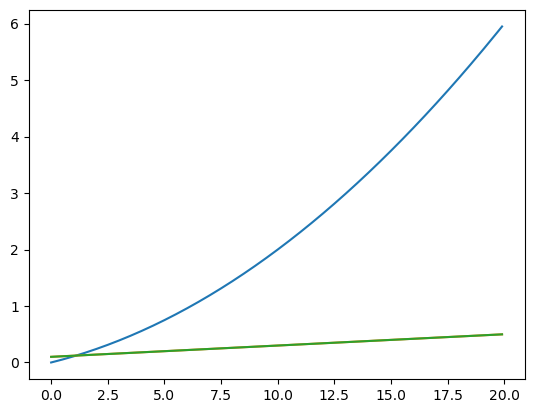

In [73]:
plt.plot(x, result)

plt.plot(x, f)
plt.plot(x, c)

plt.show()

## 편미분

In [74]:
def partial_diff(x):
    return x[0]**2 + x[1]**2

In [75]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [76]:
x2 = np.array([3.0, 4.0])
print(numerical_gradient(partial_diff, x2))

[6. 8.]


In [77]:
x2 = np.array([0.0, 2.0])
print(numerical_gradient(partial_diff, x2))

[0. 4.]


In [78]:
x2 = np.array([3.0, 0.0])
print(numerical_gradient(partial_diff, x2))

[6. 0.]


In [83]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)


TypeError: only length-1 arrays can be converted to Python scalars